**20MAI0017**

**SREELEKSHMY A**

https://github.com/sreelekshmyanil/DL-Assignments---VIT

---

---





**AlexNet**

1.      Alexnet has 5 convolutional layers which are followed by 3 fully connected layers. 

2.      Each convolutional layer consists of convolutional filters and a nonlinear activation function ReLU. The network consists of a kernel or filters with size 11 x 11, 5 x 5, 3 x 3, 3 x 3 and 3 x 3 for its five convolutional layers respectively. 

3.      The pooling layers are used to perform max pooling. 

4.      Input size is fixed due to the presence of fully connected layers.

5.      The input size is mentioned at most of the places as 224x224x3 but due to some padding which happens it works out to be 227x227x3 

6.      AlexNet overall has 60 million parameters.

ReLU Nonlinearity. AlexNet uses Rectified Linear Units (ReLU) instead of the tanh function, which was standard at the time. ReLU’s advantage is in training time; a CNN using ReLU was able to reach a 25% error on the CIFAR-10 dataset six times faster than a CNN using tanh.

Overlapping Pooling. CNNs traditionally “pool” outputs of neighboring groups of neurons with no overlapping. However, when the authors introduced overlap, they saw a reduction in error by about 0.5% and found that models with overlapping pooling generally find it harder to overfit.

The Overfitting Problem. AlexNet had 60 million parameters, a major issue in terms of overfitting. Two methods were employed to reduce overfitting:

Data Augmentation. The authors used label-preserving transformation to make their data more varied. Specifically, they generated image translations and horizontal reflections, which increased the training set by a factor of 2048. They also performed Principle Component Analysis (PCA) on the RGB pixel values to change the intensities of RGB channels, which reduced the top-1 error rate by more than 1%.

Dropout. This technique consists of “turning off” neurons with a predetermined probability (e.g. 50%). This means that every iteration uses a different sample of the model’s parameters, which forces each neuron to have more robust features that can be used with other random neurons. However, dropout also increases the training time needed for the model’s convergence.

---







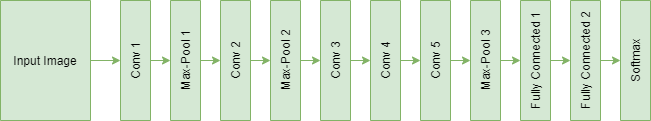



---

---





**IMPLEMENTATION**

In [237]:
#Importing Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

print("Loaded all libraries")

Loaded all libraries


In [271]:
#Instantiation
AlexNet = Sequential()

In [272]:
#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))


In [273]:
#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))


In [274]:
#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))


In [275]:
#Model Summary
AlexNet.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_10 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_10 (Activation)   (None, 4, 4, 256)       

In [277]:
print("Displaying the convolution function kernel filter coefficient values\n")
for i, layer in enumerate(AlexNet.layers):
  if i == 1:
    break
  # check for convolutional layer
  if 'conv' not in layer.name:
    continue
  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)
  print('\n')
  print(layer.weights)
  print('-----------------------------------------------------')


Displaying the convolution function kernel filter coefficient values

conv2d_48 (11, 11, 3, 96)


[<tf.Variable 'conv2d_48/kernel:0' shape=(11, 11, 3, 96) dtype=float32, numpy=
array([[[[ 0.01, -0.01, -0.01, ..., -0.01, -0.01,  0.01],
         [ 0.  , -0.02, -0.01, ...,  0.02, -0.02, -0.01],
         [ 0.01,  0.02,  0.02, ..., -0.01,  0.02, -0.  ]],

        [[ 0.01, -0.  ,  0.01, ...,  0.  ,  0.02,  0.02],
         [ 0.02, -0.01, -0.  , ..., -0.  ,  0.01,  0.  ],
         [ 0.02, -0.  , -0.01, ...,  0.01, -0.02,  0.02]],

        [[ 0.  ,  0.01,  0.02, ..., -0.02, -0.01,  0.02],
         [-0.01,  0.02, -0.01, ...,  0.02,  0.02,  0.01],
         [-0.01, -0.01, -0.  , ...,  0.02, -0.  , -0.01]],

        ...,

        [[-0.01, -0.02, -0.01, ...,  0.02,  0.01, -0.01],
         [ 0.01, -0.  , -0.02, ...,  0.01, -0.01, -0.02],
         [ 0.  ,  0.02, -0.02, ...,  0.02, -0.01, -0.  ]],

        [[ 0.  ,  0.  ,  0.02, ..., -0.02, -0.01, -0.01],
         [ 0.01,  0.  , -0.02, ..., -0.01,  0.0

In [283]:
# Compiling the model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

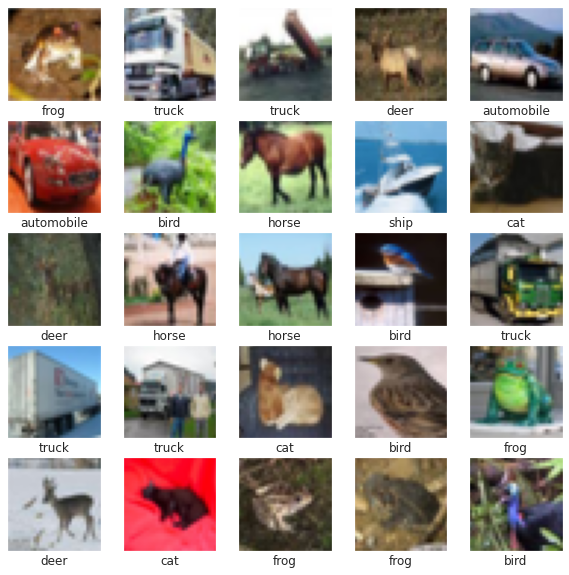

In [284]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

labels = [‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’]

In [285]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)
print("Total images present :  ",len(x_train)+len(x_val))
print("Number of classes is : 10")
#Dimension of the CIFAR10 dataset
print("Training dataset size : ",(x_train.shape,y_train.shape))
print("Validation dataset size : ",(x_val.shape,y_val.shape))
print("Testing dataset size : ",(x_test.shape,y_test.shape))
print("Size of single image : ",(x_train[0]).size)

Total images present :   50000
Number of classes is : 10
Training dataset size :  ((35000, 32, 32, 3), (35000, 1))
Validation dataset size :  ((15000, 32, 32, 3), (15000, 1))
Testing dataset size :  ((10000, 32, 32, 3), (10000, 1))
Size of single image :  3072


In [286]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [287]:
#Defining the parameters
batch_size= 100
epochs=62

In [288]:
print("Fit model on training data")
history = AlexNet.fit(
   x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/62
350/350 [==============================] - 13s 33ms/step - loss: 1.7876 - accuracy: 0.3578 - val_loss: 2.5488 - val_accuracy: 0.2656
Epoch 2/62
350/350 [==============================] - 11s 32ms/step - loss: 1.3922 - accuracy: 0.5106 - val_loss: 2.0500 - val_accuracy: 0.3061
Epoch 3/62
350/350 [==============================] - 11s 32ms/step - loss: 1.2437 - accuracy: 0.5733 - val_loss: 1.7882 - val_accuracy: 0.3858
Epoch 4/62
350/350 [==============================] - 11s 32ms/step - loss: 1.1220 - accuracy: 0.6151 - val_loss: 1.4998 - val_accuracy: 0.4881
Epoch 5/62
350/350 [==============================] - 11s 32ms/step - loss: 1.0233 - accuracy: 0.6539 - val_loss: 1.9497 - val_accuracy: 0.3861
Epoch 6/62
350/350 [==============================] - 11s 32ms/step - loss: 0.9364 - accuracy: 0.6874 - val_loss: 1.4779 - val_accuracy: 0.4947
Epoch 7/62
350/350 [==============================] - 11s 32ms/step - loss: 0.8387 - accuracy: 0.7184 - val_l

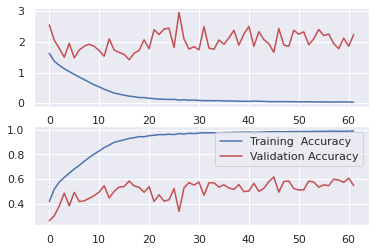

In [289]:
#Visualize its performance.



#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(AlexNet.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(AlexNet.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(AlexNet.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(AlexNet.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [290]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


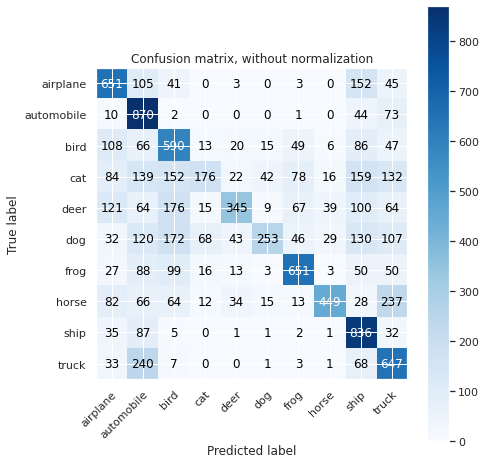

In [291]:
#Making prediction
y_pred=AlexNet.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

In [292]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)

#Making prediction
x_pred=AlexNet.predict_classes(x_train)
x_true=np.argmax(y_train,axis=1)

print("Training accuracy : ",accuracy_score(x_true, x_pred))
print('Testing accuracy : ', acc_score)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training accuracy :  0.8543714285714286
Testing accuracy :  0.5468




---

---

---







**USING PRETRAINED MODEL**

In [ ]:
from torchvision import models
import torch
import torchvision

In [ ]:
alexnet = models.alexnet(pretrained=True)

In [ ]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

We are defining an object through which we can transform an image into the required image dataset that will be compatible with the AlexNet model. Using the below code snippet, the input image will be first converted to the size 256×256 pixels and then cropped to the size 224×224 pixels as the AlexNet model require the input images with size 224×224. Finally, the image dataset will be converted to the PyTorch tensor data type. To normalize the input image data set, the mean and standard deviation of the pixels data is used as per the standard values suggested by the PyTorch.

In [ ]:
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
#Downloading training data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

#Downloading test data
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

#Class labels

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


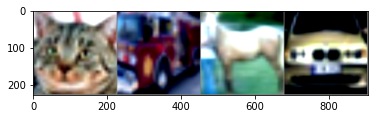

  Cat Truck Horse   Car


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Function to show some random images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
#Now using the AlexNet
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)

#Model description
AlexNet_model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Updating the second classifier
import torch.nn as nn
AlexNet_model.classifier[4] = nn.Linear(4096,1024)

#Updating the third and the last classifier that is the output layer of the network. Make sure to have 10 output nodes if we are going to get 10 class labels through our model.
AlexNet_model.classifier[6] = nn.Linear(1024,10)

In [ ]:
AlexNet_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Instantiating CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Verifying CUDA
print(device)

#Move the input and AlexNet_model to GPU for speed if available
AlexNet_model.to(device)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
import torch.optim as optim
import torch.nn as nn

#Loss
criterion = nn.CrossEntropyLoss()

#Optimizer(SGD)
optimizer = optim.SGD(AlexNet_model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = AlexNet_model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training of AlexNet')

[1,  2000] loss: 1.194
[1,  4000] loss: 0.874
[1,  6000] loss: 0.748
[1,  8000] loss: 0.709
[1, 10000] loss: 0.679
[1, 12000] loss: 0.650
[2,  2000] loss: 0.487
[2,  4000] loss: 0.477
[2,  6000] loss: 0.484
[2,  8000] loss: 0.469
[2, 10000] loss: 0.461
[2, 12000] loss: 0.479
[3,  2000] loss: 0.309
[3,  4000] loss: 0.322
[3,  6000] loss: 0.342
[3,  8000] loss: 0.331
[3, 10000] loss: 0.356
[3, 12000] loss: 0.351
[4,  2000] loss: 0.223
[4,  4000] loss: 0.238
[4,  6000] loss: 0.252
[4,  8000] loss: 0.266
[4, 10000] loss: 0.267
[4, 12000] loss: 0.274
[5,  2000] loss: 0.176
[5,  4000] loss: 0.167
[5,  6000] loss: 0.193
[5,  8000] loss: 0.209
[5, 10000] loss: 0.205
[5, 12000] loss: 0.198
[6,  2000] loss: 0.140
[6,  4000] loss: 0.137
[6,  6000] loss: 0.149
[6,  8000] loss: 0.159
[6, 10000] loss: 0.170
[6, 12000] loss: 0.160
[7,  2000] loss: 0.102
[7,  4000] loss: 0.132
[7,  6000] loss: 0.116
[7,  8000] loss: 0.126
[7, 10000] loss: 0.140
[7, 12000] loss: 0.140
[8,  2000] loss: 0.111
[8,  4000] 

In [ ]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 84 %


In [ ]:
#Testing classification accuracy for individual classes.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Airplane : 83 %
Accuracy of   Car : 93 %
Accuracy of  Bird : 74 %
Accuracy of   Cat : 66 %
Accuracy of  Deer : 87 %
Accuracy of   Dog : 82 %
Accuracy of  Frog : 94 %
Accuracy of Horse : 85 %
Accuracy of  Ship : 90 %
Accuracy of Truck : 89 %


In [ ]:
avg = 0
for i in range(10):
  temp = (100 * class_correct[i] / class_total[i])
  avg = avg + temp
avg = avg/10
print('Average accuracy = ', avg)

Average accuracy =  84.81000000000002




---

---

---







**CNN**

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.A ConvNet is able to successfully capture the Spatial and Temporal dependencies in an image through the application of relevant filters. The architecture performs a better fitting to the image dataset due to the reduction in the number of parameters involved and reusability of weights. In other words, the network can be trained to understand the sophistication of the image better.

In [195]:
#Importing Libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,AveragePooling2D
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [209]:
#DATASET

In [210]:
#(x_train, y_train),(x_test, y_test)
print(x_train.shape)

(50000, 32, 32, 3)


In [211]:
#Our dataset consists of color images since in shape, channel is 3 - RGB

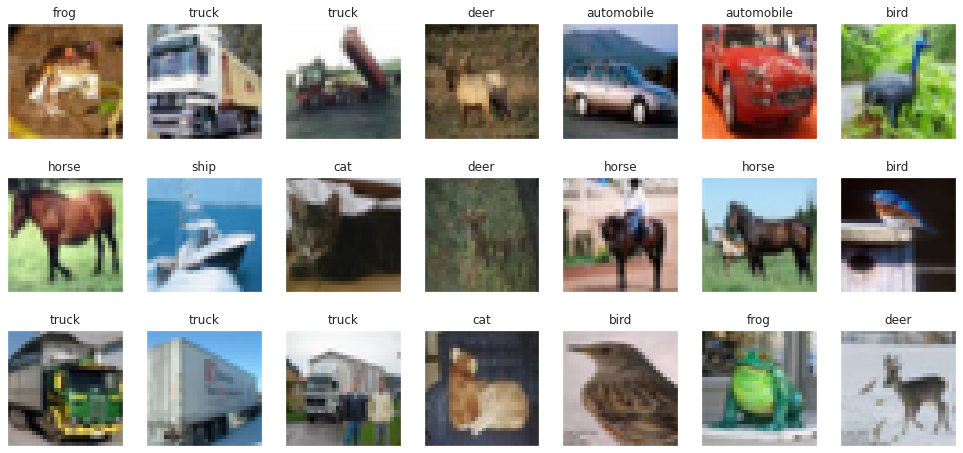

In [212]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(X_train, y_train), (X_test, y_test) = (x_train, y_train),(x_test, y_test)
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [213]:
# Since our image is RGB, we are converting it to GRAYSCALE

In [214]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

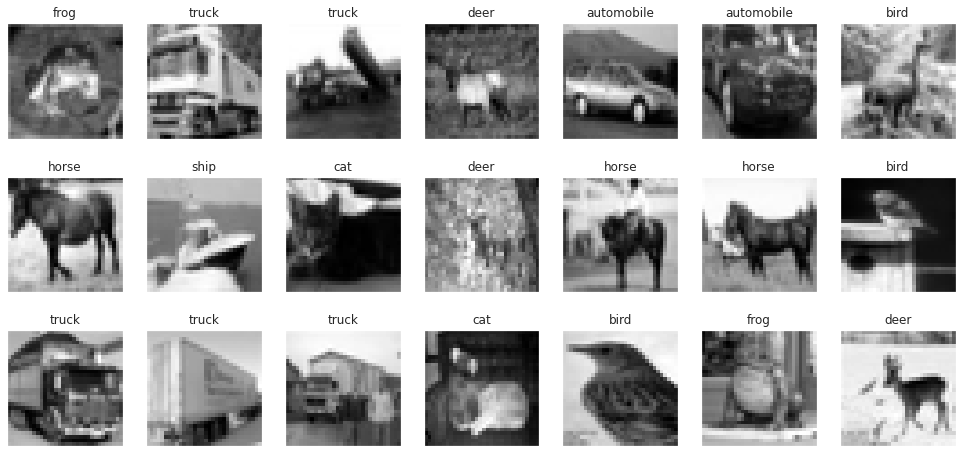

In [215]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [216]:
#normalize
X_train  = X_train/255
X_test  = X_test/255

In [217]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [218]:
one_hot_encoder.fit(y_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [219]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [220]:
'''
Notice here that if we check the shape of X_train and X_test, the size will be (50000, 32, 32) and (10000, 32, 32) respectively. 
This shape is not acceptable by Conv2D layer that we are going to implement. So, we need to reshape those two arrays

'''

'\nNotice here that if we check the shape of X_train and X_test, the size will be (50000, 32, 32) and (10000, 32, 32) respectively. \nThis shape is not acceptable by Conv2D layer that we are going to implement. So, we need to reshape those two arrays\n\n'

In [221]:
X_train.shape

(50000, 32, 32)

In [222]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [223]:
X_train.shape

(50000, 32, 32, 1)

In [224]:
#CNN architecture

Input Image

Convolutional Layer

Nonlinearity

Pooling Layer

*   Average pooling involves calculating the average for each patch of the feature map. 
   



In [225]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [226]:
input_shape

(32, 32, 1)

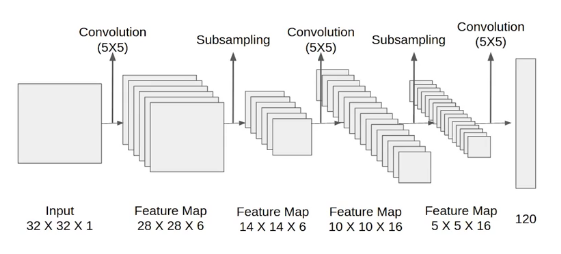

In [227]:
model = Sequential()

'''keras.layers.Conv2D(filters, kernel_size, strides=(1, 1),
  padding='valid', data_format=None, dilation_rate=(1, 1),
  activation=None, use_bias=True, kernel_initializer='glorot_uniform',
  bias_initializer='zeros', kernel_regularizer=None,
  bias_regularizer=None, activity_regularizer=None,
  kernel_constraint=None, bias_constraint=None)'''

# Building the Model Architecture
model = Sequential()

# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(AveragePooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(AveragePooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(10, activation='softmax'))

In [228]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_28 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_29 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_45 (Dense)             (None, 84)              

In [229]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [230]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 2.0261 - accuracy: 0.2499 - val_loss: 1.6861 - val_accuracy: 0.3871
Epoch 2/50
391/391 [==============================] - 2s 4ms/step - loss: 1.6331 - accuracy: 0.4123 - val_loss: 1.6223 - val_accuracy: 0.4210
Epoch 3/50
391/391 [==============================] - 2s 4ms/step - loss: 1.5404 - accuracy: 0.4461 - val_loss: 1.4979 - val_accuracy: 0.4618
Epoch 4/50
391/391 [==============================] - 2s 4ms/step - loss: 1.4682 - accuracy: 0.4711 - val_loss: 1.4718 - val_accuracy: 0.4774
Epoch 5/50
391/391 [==============================] - 2s 4ms/step - loss: 1.4095 - accuracy: 0.4966 - val_loss: 1.4245 - val_accuracy: 0.4901
Epoch 6/50
391/391 [==============================] - 2s 4ms/step - loss: 1.3570 - accuracy: 0.5159 - val_loss: 1.3524 - val_accuracy: 0.5207
Epoch 7/50
391/391 [==============================] - 2s 4ms/step - loss: 1.3196 - accuracy: 0.5316 - val_loss: 1.3204 - val_accuracy: 0.5342
Epoch 

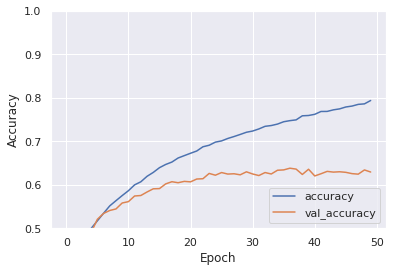

In [231]:
# plot metrics
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [232]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 1.2406 - accuracy: 0.6294


In [233]:
result = model.predict(X_test)
predicted_class = np.argmax(result, axis=1)
true_class = np.argmax(y_test, axis=1)
num_correct = np.sum(predicted_class == true_class) 
accuracy = float(num_correct)/result.shape[0]
print("The accuracy obtained is : ",round(accuracy * 100,3))

The accuracy obtained is :  62.94


In [234]:
# Libraries and modules for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [235]:
print(classification_report(true_class, predicted_class))

              precision    recall  f1-score   support

           0       0.72      0.65      0.69      1000
           1       0.71      0.78      0.74      1000
           2       0.58      0.44      0.50      1000
           3       0.42      0.43      0.42      1000
           4       0.53      0.66      0.59      1000
           5       0.57      0.49      0.53      1000
           6       0.59      0.80      0.68      1000
           7       0.74      0.65      0.69      1000
           8       0.74      0.72      0.73      1000
           9       0.73      0.67      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



In [236]:
print(confusion_matrix(true_class, predicted_class))

[[654  34  76  39  52   8  23  10  62  42]
 [ 14 779  10  12   6   8  44   3  45  79]
 [ 55  14 443  85 134  68 114  47  25  15]
 [ 23  34  60 427 115 130 127  33  21  30]
 [ 17  14  47  72 656  30  89  53  21   1]
 [ 13   8  42 192 103 486  74  54  10  18]
 [ 16  31  24  47  33  18 799   7  16   9]
 [ 15  10  21  64 110  79  24 651   9  17]
 [ 75  66  26  23  16   9  25   2 725  33]
 [ 27 108  12  56  17  11  37  18  40 674]]
